# Data Exploration of MAC

In [1]:
import os
import sys

# Get the current working directory
notebook_dir = os.getcwd()

# Change the working directory to the root directory of the project
os.chdir("../")

# move up to the parent directory(project root)
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

os.getcwd()

'/home/mhannani/Documents/sentiment_analysis'

In [29]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.parsers import parse_toml

In [30]:
# configration filepath
CONFIG_FILE = Path("configs/config.toml")

# read configuration object
config = parse_toml(CONFIG_FILE)

# useful variables
data_root = Path(config['data']['root'])
exernal_data = config['data']['external']
raw_data = config['data']['raw']
interim_data = config['data']['interim']
processed_data = config['data']['processed']
mac_csv_filename = config['data']['mac_csv_filename']

In [40]:
# constructing the filepath of the corpus
csv_filepath_raw_data = data_root / raw_data / mac_csv_filename

# read csv file
df = pd.read_csv(csv_filepath_raw_data.as_posix())

# Droping the 'class' column
df.drop(columns=['class'], inplace=True)

# Remove rows where the 'type' column has the value 'mixed'
df = df[df['type'] != 'mixed']

In [41]:
df

,tweets,type
0,ماهي آرائكم متتبعي الكرام,neutral
1,عبقرية المدرب وروعة اللاعبين,positive
2,أمة عربية واحدة خالدة,positive
3,عاد إليكم من جديد وأخيرا درت جيم لهاد الصفحة,neutral
4,الله يخلف عليك سيدي محمد,positive
...,...,...
18082,ريالية و افتخر و نعلي راسي الفوق,positive
18083,ماكاين مشكل,positive
18084,سمح ليا ماقصدتش,positive
18085,الله يكمل عليها بالخير,positive


## Class frequency 

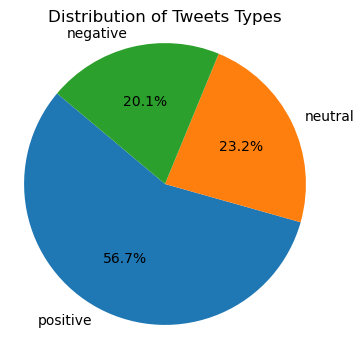

In [49]:
# Calculate the frequency of each unique value in the 'type' column
type_counts = df_filtered['type'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tweets Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()